# Compute Drawdowns

C:\Users\shantala.mukherjee\AppData\Local\Temp\ipykernel_8040\201083726.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",


<Axes: >

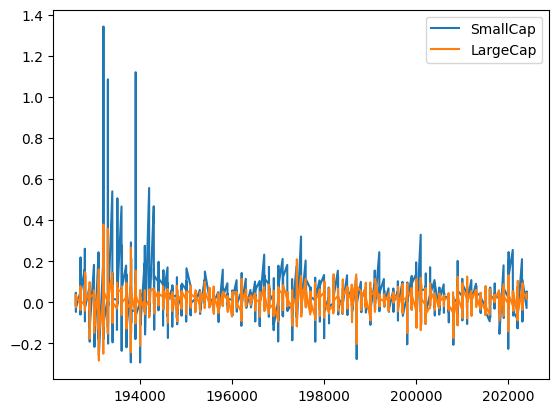

In [1]:
import pandas as pd 
me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                      skiprows=1,
                      header=0, index_col=0, parse_dates=True, na_values=-99.99
                      )
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [2]:
rets.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       202306, 202307, 202308, 202309, 202310, 202311, 202312, 202401, 202402,
       202403],
      dtype='int64', length=1173)

In [4]:
# Currently, the index is of dtype int64. We will format the index as datetime
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()


,SmallCap,LargeCap
1926-07-01,-0.0142,0.0329
1926-08-01,0.0461,0.0370
1926-09-01,0.0091,0.0067
1926-10-01,-0.0472,-0.0243
1926-11-01,-0.0077,0.0270


In [5]:
rets.index # now we have a datetime index for the dataframe

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01'],
              dtype='datetime64[ns]', length=1173, freq=None)

In [6]:
# to treat each of the timestamps as the monthly period rather than one date in the month, we do:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0142,0.0329
1926-08,0.0461,0.0370
1926-09,0.0091,0.0067
1926-10,-0.0472,-0.0243
1926-11,-0.0077,0.0270


In [18]:
# Now we have a period index for the dataframe
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11',
             '2023-12', '2024-01', '2024-02', '2024-03'],
            dtype='period[M]', length=1173)

In [20]:
rets.loc["1977"] # access returns for years via the periodindex

,SmallCap,LargeCap
1977-01,0.0689,-0.0598
1977-02,0.0169,-0.0163
1977-03,0.0168,-0.0155
1977-04,0.0208,-0.0031
1977-05,0.0100,-0.0194
1977-06,0.0493,0.0532
1977-07,0.0257,-0.0144
1977-08,0.0024,-0.0140
1977-09,0.0205,-0.0067
1977-10,-0.0181,-0.0476


In [21]:
rets.loc["1980":"1982"] # access returns for consecutive periods via the periodindex

,SmallCap,LargeCap
1980-01,0.1327,0.0485
1980-02,0.0056,-0.0167
1980-03,-0.1753,-0.0752
1980-04,0.0400,0.0457
1980-05,0.0645,0.0649
1980-06,0.0419,0.0243
1980-07,0.0902,0.0695
1980-08,0.0829,0.0119
1980-09,0.0659,0.0269
1980-10,0.0623,0.0040


## Compute Drawdowns
1. Compute the wealth index
2. Compute previous peaks
3. Compute drawdown -- which is the wealth value as a percentage of the previous peak

In [22]:
# wealth index for large caps, based to 1000 currency units
wealth_index = 1000*(1+rets['LargeCap']).cumprod() # cumulative product
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

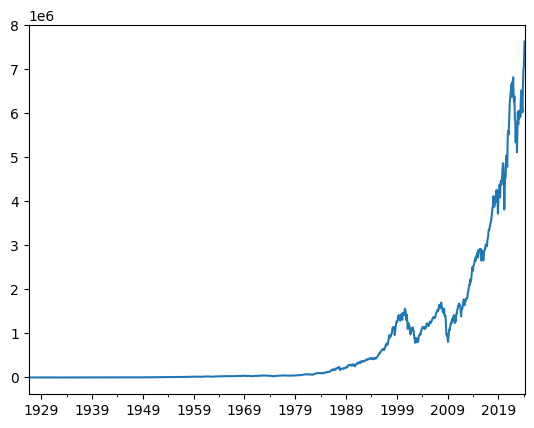

In [23]:
wealth_index.plot.line()

In [24]:
# compute the previous peaks for large caps from the wealth index series:
previous_peaks = wealth_index.cummax() # cumulative max

<Axes: >

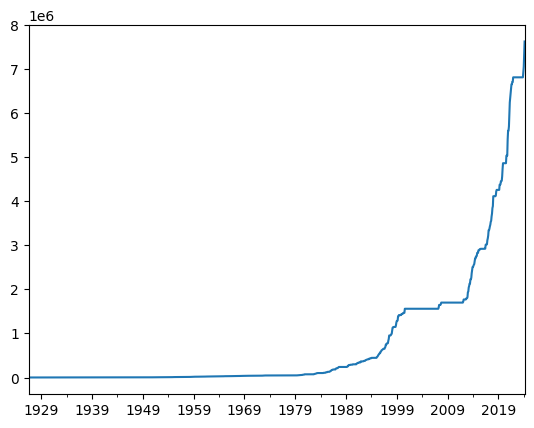

In [25]:
previous_peaks.plot() # default plot is a line plot

<Axes: >

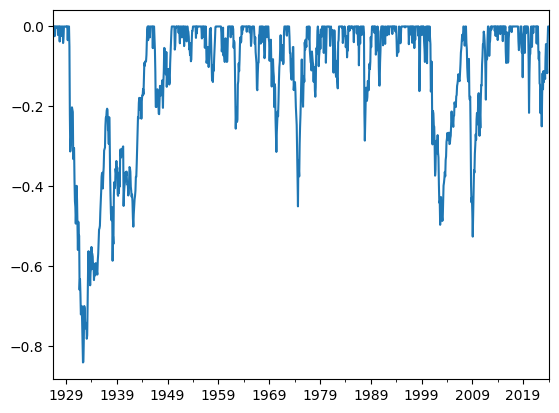

In [26]:
# calculate drawdowns
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [27]:
drawdown.min() # the most negative number

-0.8400375277943123

In [28]:
# we can also get max drawdowns for particular periods, as the drawdown dataframe is a time series
drawdown.loc["1975":].min() # max drawdown since 1975

-0.5253944117543065

In [29]:
drawdown.loc["1975":].idxmin() # return the index of the max drawdown value since 1975

Period('2009-02', 'M')

In [30]:
drawdown.idxmin()

Period('1932-05', 'M')

In [32]:
# we will now define a function that calculate drawdowns for us, so we don't have to retype the formulae every time
def drawdown(return_series: pd.Series):  # specifying the input as a series, and in particular, as a Pandas series
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percentage drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })


In [33]:
# try this function on the large cap returns
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<Axes: >

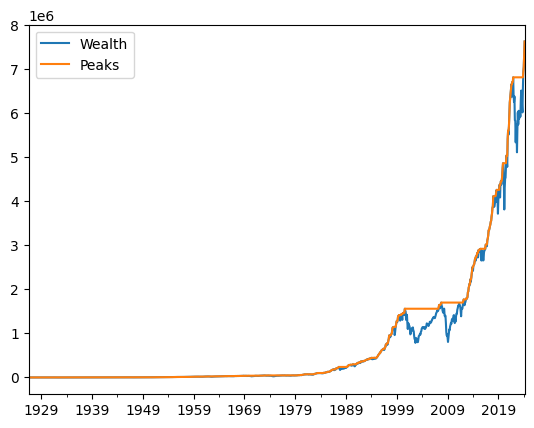

In [34]:
drawdown(rets["LargeCap"])[["Wealth","Peaks"]].plot()

<Axes: >

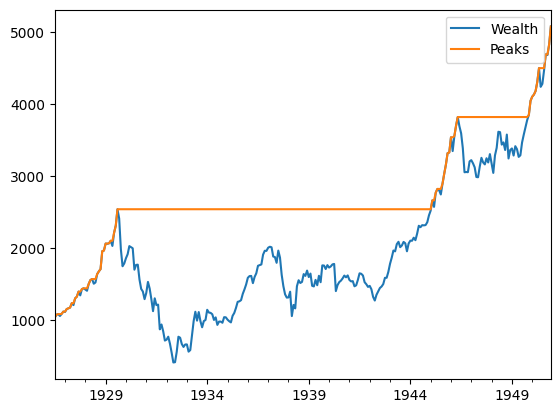

In [35]:
# choosing a subperiod to investigate
drawdown(rets.loc[:"1950"]["LargeCap"])[["Wealth","Peaks"]].plot()

In [36]:
drawdown(rets["LargeCap"])[["Drawdown"]].min()

Drawdown   -0.840038
dtype: float64

In [37]:
drawdown(rets["SmallCap"])[["Drawdown"]].min()

Drawdown   -0.837451
dtype: float64

In [38]:
drawdown(rets["SmallCap"])[["Drawdown"]].idxmin()

Drawdown    1932-05
dtype: period[M]

In [39]:
drawdown(rets["LargeCap"])[["Drawdown"]].idxmin()

Drawdown    1932-05
dtype: period[M]

In [40]:
# since 1940
drawdown(rets.loc["1940":]["SmallCap"])[["Drawdown"]].min()

Drawdown   -0.701388
dtype: float64

In [41]:
drawdown(rets.loc["1940":]["SmallCap"])[["Drawdown"]].idxmin()

Drawdown    1974-12
dtype: period[M]

In [42]:
# since 1975
drawdown(rets.loc["1975":]["SmallCap"])[["Drawdown"]].min()

Drawdown   -0.636867
dtype: float64

In [43]:
drawdown(rets.loc["1975":]["SmallCap"])[["Drawdown"]].idxmin()

Drawdown    2009-02
dtype: period[M]

In [44]:
# since 1975
drawdown(rets.loc["1975":]["LargeCap"])[["Drawdown"]].min()

Drawdown   -0.525394
dtype: float64

In [45]:
drawdown(rets.loc["1975":]["LargeCap"])[["Drawdown"]].idxmin()

Drawdown    2009-02
dtype: period[M]